# **Introduction**
In this documentation, I will present a hybrid machine learning model that I have built for predicting student performance in a class. By using the power of Support Vector Machine (SVM), Gaussian Naive Bayes (GNB), and One-Hot Encoder (OHE) which is a decision tree, I aim to develop a robust and accurate model that incorporates various data inputs, such as class assignments, quizzes, class attendance, and internet usage, to predict student performance.

# **Problem Statement**
As an educator, I understand the importance of predicting student performance to identify students who may need additional support or interventions. To address this need, I set out to build a machine learning model that can effectively analyze multiple data sources, including class assignments, quizzes, class attendance, and internet usage, and predict student performance accurately.


# Importing Libraies for the model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import svm
from sklearn import tree as tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib

# Input Variables:
Selected the following input variables for my hybrid model:

1.   Class Assignments: Scores or grades obtained by students in different class assignments or projects.

2.   Quizzes: Performance metrics in quizzes or short assessments conducted during the course.
3.    Class Attendance: Information on student attendance, such as the number of classes attended or attendance percentage.

4.  Internet Usage: Metrics related to internet usage, such as time spent on online learning platforms or engagement with online educational resources.

# Output Variable:
The output variable is the predicted student performance, represented as a binary classification (e.g., high-performing or low-performing) or a multi-class classification (e.g., grades A, B, C, D, or F).


In [ ]:
sheet1 = pd.read_excel('Data.csv')
sheet1['Assignment Score'] = sheet1.iloc[:,18:23].sum(axis=1)
sheet1['Class Attendance'] = sheet1.iloc[:,7:17].sum(axis=1)
sheet1

,Response,What is your gender,Year of study,The internet in my home is reliable in terms of signal strength,The internet in terms of signal strength on campus is reliable,The lighten system in my classroom and dormitory is reliable,The lighten system on campus is reliable,Class attendance checklist Monday,Class attendance checklist Tuesday,Class attendance checklist Wednesday,...,LMS attendance checklist (number of hours students chat tutors) (Wednesday),LMS attendance checklist (number of hours students chat tutors) (Thursday),LMS attendance checklist (number of hours students chat tutors) (Friday),LMS Assignments,LMS Quizzes,LMS access to notes checklist,What feature in the Learning management system contribute mostly in your academic performance and why?,How do you expect your academic performance to be improved by,Assignment Score,Class Attendance
0,1,1,3,4,3,3,1,1,1,1,...,1,1,1,1,1,1,CHAT,Governtment: Building of more lecture rooms an...,5,10
1,2,2,4,3,1,1,1,1,1,1,...,1,1,1,1,1,1,FORUMN,School authorities: They should continue to r...,5,10
2,3,1,2,4,2,3,3,1,0,0,...,1,1,1,1,1,1,ZOOM/VIDEO LECTURES,School authorities: To provide students handb...,5,8
3,4,1,2,2,2,1,2,1,1,1,...,1,1,1,1,1,1,FILE,Tutors: They should be always be regular and p...,5,10
4,5,1,2,2,2,2,2,1,1,1,...,1,1,1,1,1,1,CHAT,Government: The government should pay the allo...,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,172,2,2,2,2,1,1,1,1,1,...,1,1,1,1,1,1,ZOOM/VIDEO LECTURES,Tutors: Tutors must use a valid appropriate me...,5,10
171,173,2,2,1,2,2,1,1,1,1,...,1,1,1,1,1,1,ZOOM/VIDEO LECTURES,Government: The government shoulde provide a c...,5,10
172,174,2,2,1,1,1,1,1,1,1,...,1,1,1,1,1,1,CHAT,School authorities: The school must provide a ...,5,10
173,175,2,2,2,1,2,1,1,1,1,...,1,1,1,1,1,1,ZOOM/VIDEO LECTURES,Tutors: Tutors should consider the interest of...,5,10


## Pruning the Dataset 
The resulting DataFrame, 'gen1', 'gen2', 'gen3', would contain the original data except for the columns that were dropped, effectively retaining only the 'Class Attendance' column and removing the original columns 0 to 29.

In [ ]:
gen1 = pd.read_excel('Data.csv')
gen1['Class Attendance'] = gen1.iloc[:,7:17].sum(axis=1)
column_groups = [list(range(0, 30))]
gen1.drop(gen1.columns[column_groups], axis=1, inplace=True)
gen1

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:5339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Class Attendance
0,10
1,10
2,8
3,10
4,10
...,...
170,10
171,10
172,10
173,10


In [ ]:
gen2 = pd.read_excel('Data.csv')
gen2['Assignment Score'] = gen2.iloc[:,18:23].sum(axis=1)
column_groups = [list(range(0, 30))]
gen2.drop(gen2.columns[column_groups], axis=1, inplace=True)
gen2

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:5339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Assignment Score
0,5
1,5
2,5
3,5
4,5
...,...
170,5
171,5
172,5
173,5


In [ ]:
gen3 = pd.read_excel('Data.csv')
gen3['Internet'] = gen3.iloc[:,3:5].sum(axis=1)
column_groups = [list(range(0, 30))]
gen3.drop(gen3.columns[column_groups], axis=1, inplace=True)
gen3

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:5339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Internet
0,7
1,4
2,6
3,4
4,4
...,...
170,4
171,3
172,2
173,3


## Categorizing data
The 'combined_sheet' DataFrame would contain the combined data from the three original DataFrames, with the columns arranged in the order of 'gen1', 'gen2', and 'gen3'. The number of rows in 'combined_sheet' would depend on the number of rows in the original DataFrames and how they align during the concatenation process.


In [ ]:
combined_sheet = pd.concat([gen1, gen2, gen3], axis=1)
combined_sheet

,Class Attendance,Assignment Score,Internet
0,10,5,7
1,10,5,4
2,8,5,6
3,10,5,4
4,10,5,4
...,...,...,...
170,10,5,4
171,10,5,3
172,10,5,2
173,10,5,3


## Comparing Performance and Class Attendance Between Genders: A Data Visualization Study
the code generates bar plots to visualize the relationship between each score column and the 'Assignment Score' and 'Class Attendance' columns in the 'sheet1' DataFrame, allowing for a comparison of scores and class attendance across different genders.

In [ ]:
scores = sheet1.columns[sheet1.columns.str.contains('gender')].tolist()
scores

['What is your gender']

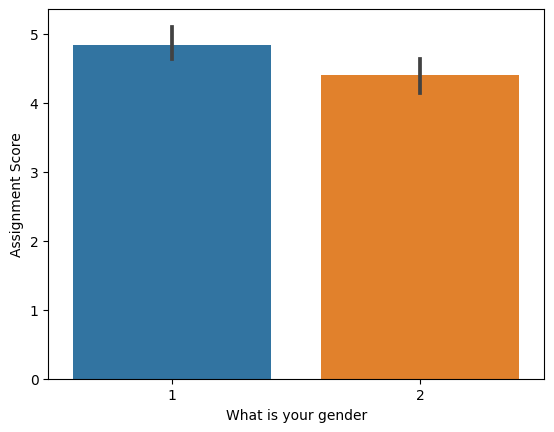

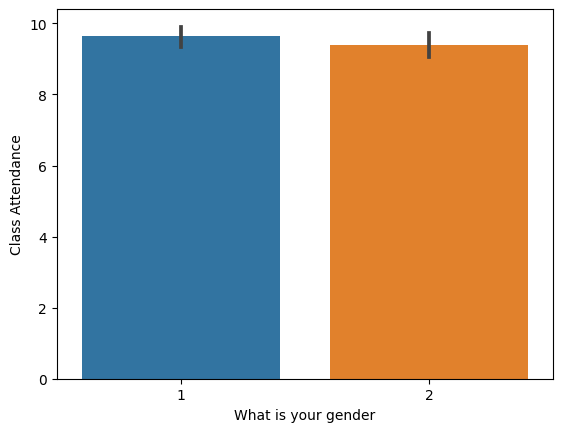

In [ ]:
for score in scores:
    sns.barplot(x=sheet1[score], y=sheet1['Assignment Score'])
    plt.show()

for score in scores:
    sns.barplot(x=sheet1[score], y=sheet1['Class Attendance'])
    plt.show()


## Visualizing the Relationship Between Home and Campus Internet Signals: A Data Visualization Study

The provided code generates bar plots to visualize the relationship between each internet signal column at home and the 'Class Attendance' column in the 'sheet1' DataFrame. The objective is to compare internet signals at home and on campus, focusing on the differences observed across different locations.

In [ ]:
ct = sheet1.columns[sheet1.columns.str.contains('internet ')].tolist()
ct

['The internet in my home is reliable in terms of signal strength ',
 'The internet in terms of signal strength on campus is reliable ']

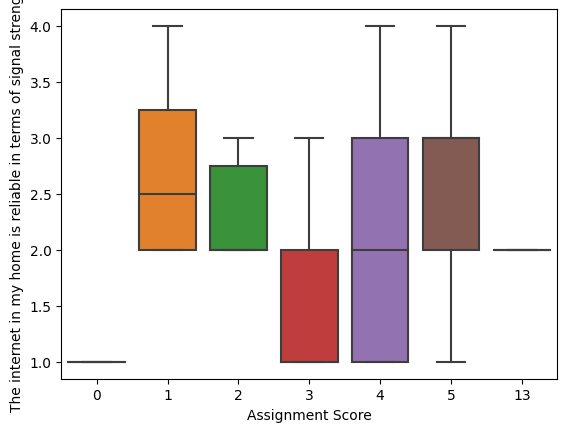

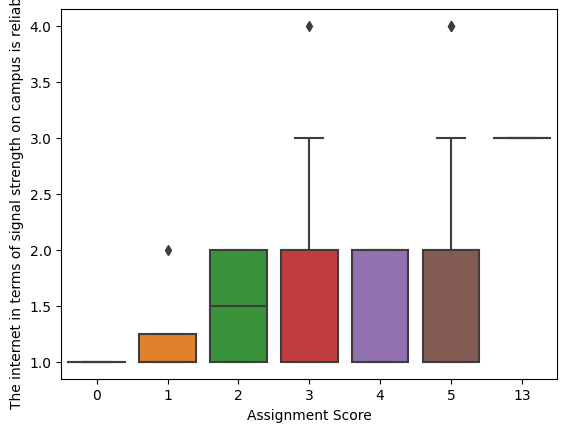

In [ ]:
for ct in ct:
    sns.boxplot(y=sheet1[ct], x=sheet1['Assignment Score'])
    plt.show()

In [ ]:
ct = sheet1.columns[sheet1.columns.str.contains('internet ')].tolist()

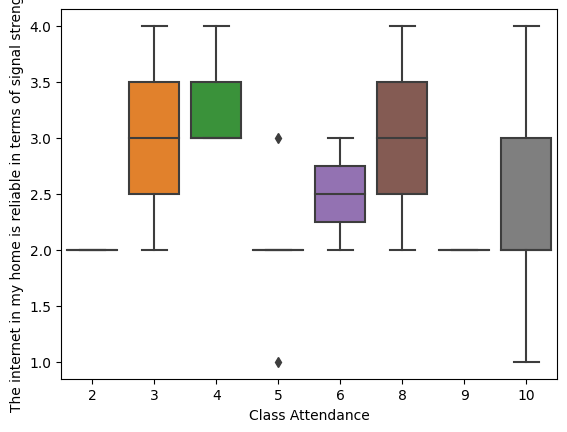

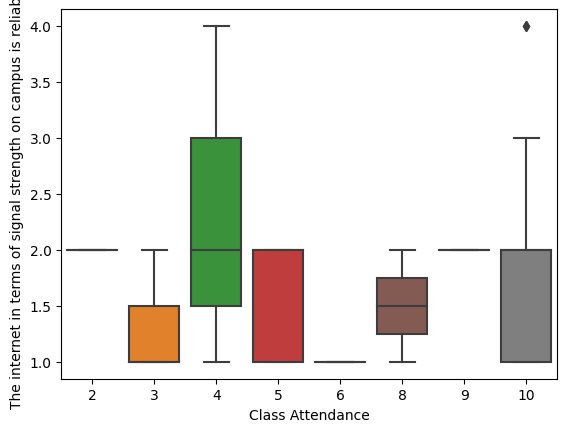

In [ ]:
for ct in ct:
    sns.boxplot(y=sheet1[ct], x=sheet1['Class Attendance'])
    plt.show()

In [ ]:
scores = sheet1.columns[sheet1.columns.str.contains('lighten ')].tolist()
scores

['The lighten system in my classroom and dormitory is reliable',
 'The lighten system on campus is reliable ']

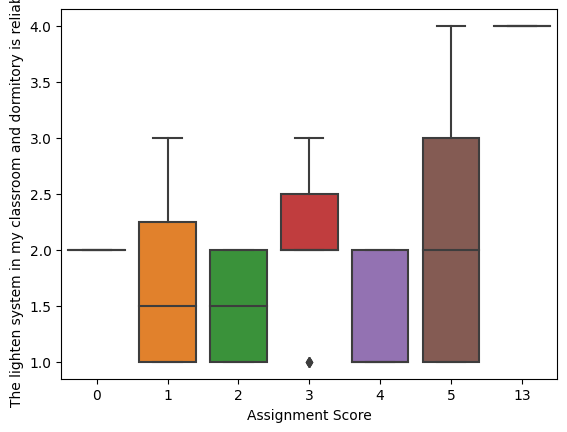

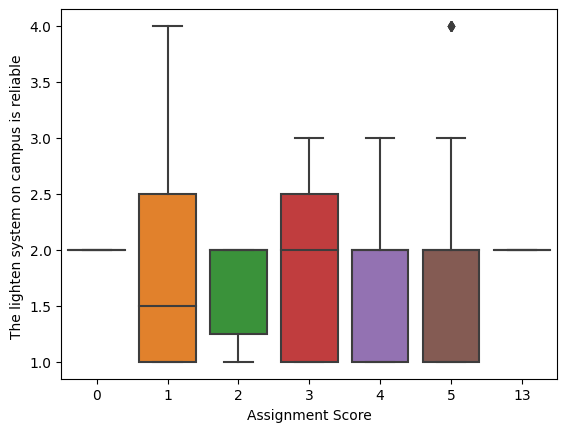

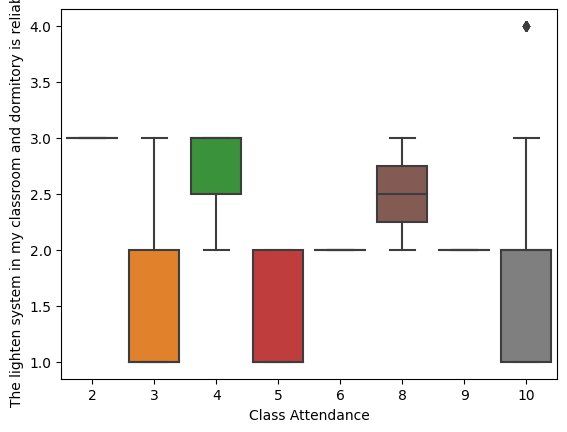

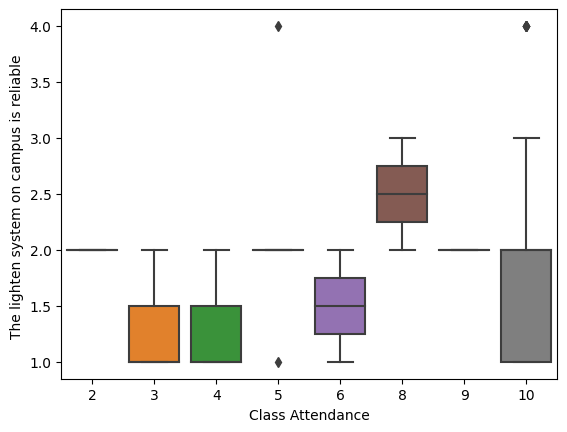

In [ ]:
for score in scores:
    sns.boxplot(y=sheet1[score], x=sheet1['Assignment Score'])
    plt.show()

for score in scores:
    sns.boxplot(y=sheet1[score], x=sheet1['Class Attendance'])
    plt.show()

In [ ]:
week1 = pd.read_excel('attendance 2.xlsx')
week1['Week Two Attendance'] = week1.iloc[:, 1:16].sum(axis=1)
column_groups = [list(range(0, 16))]
week1.drop(week1.columns[column_groups], axis=1, inplace=True)
week1

<ipython-input-15-02e988266fe8>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  week1['Week Two Attendance'] = week1.iloc[:, 1:16].sum(axis=1)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:5339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Week Two Attendance
0,13
1,11
2,8
3,13
4,13
...,...
170,13
171,13
172,13
173,13


In [ ]:
week2 = pd.read_excel('attendance 3.xlsx')
week2['Week Three Attendance'] = week2.iloc[:, 1:16].sum(axis=1)
column_groups = [list(range(0, 16))]
week2.drop(week2.columns[column_groups], axis=1, inplace=True)
week2

<ipython-input-16-cfbdad8aaa62>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  week2['Week Three Attendance'] = week2.iloc[:, 1:16].sum(axis=1)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:5339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Week Three Attendance
0,13
1,11
2,13
3,13
4,13
...,...
170,13
171,13
172,13
173,11


In [ ]:
week3 = pd.read_excel('attendance 4.xlsx')
week3['Week Four Attendance'] = week3.iloc[:, 1:16].sum(axis=1)
column_groups = [list(range(0, 16))]
week3.drop(week3.columns[column_groups], axis=1, inplace=True)
week3

<ipython-input-17-702151317871>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  week3['Week Four Attendance'] = week3.iloc[:, 1:16].sum(axis=1)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:5339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Week Four Attendance
0,12
1,12
2,14
3,9
4,14
...,...
170,12
171,14
172,14
173,13


In [ ]:
week5 = pd.read_excel('Week 6.xlsx')
week5['Week Six Attendance'] = week5.iloc[:, 1:16].sum(axis=1)
column_groups = [list(range(0, 16))]
week5.drop(week5.columns[column_groups], axis=1, inplace=True)
week5

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:5339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Week Six Attendance
0,14
1,14
2,14
3,14
4,15
...,...
170,13
171,14
172,14
173,15


In [ ]:
week4 = pd.read_excel('attendance 5.xlsx')
week4['Week Five Attendance'] = week4.iloc[:, 1:16].sum(axis=1)
column_groups = [list(range(0, 16))]
week4.drop(week4.columns[column_groups], axis=1, inplace=True)
week4

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:5339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Week Five Attendance
0,13
1,8
2,15
3,15
4,15
...,...
170,13
171,15
172,15
173,14


In [ ]:
week6 = pd.read_excel('Week 7.xlsx')
week6['Week Six Attendance'] = week6.iloc[:, 1:16].sum(axis=1)
column_groups = [list(range(0, 16))]
week6.drop(week6.columns[column_groups], axis=1, inplace=True)
week6

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:5339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Week Seven Attendance
0,13
1,14
2,14
3,14
4,15
...,...
170,13
171,11
172,15
173,15


# Data Preprocessing
Before building the hybrid model, I performed several preprocessing steps to ensure data quality and compatibility with the chosen classifiers.


In [ ]:
combined_file = pd.concat([week1, week2, week3, week4, week5, week6, sheet1], axis=1)
combined_file['Total Attendance'] = combined_file.iloc[:, 1:17].sum(axis=1)
combined_file

,Week Two Attendance,Week Three Attendance,Week Four Attendance,Week Five Attendance,Week Six Attendance,Week Seven Attendance,Response,What is your gender,Year of study,The internet in my home is reliable in terms of signal strength,...,LMS attendance checklist (number of hours students chat tutors) (Thursday),LMS attendance checklist (number of hours students chat tutors) (Friday),LMS Assignments,LMS Quizzes,LMS access to notes checklist,What feature in the Learning management system contribute mostly in your academic performance and why?,How do you expect your academic performance to be improved by,Assignment Score,Class Attendance,Total Attendance
0,13,13,12,13,14,13,1,1,3,4,...,1,1,1,1,1,CHAT,Governtment: Building of more lecture rooms an...,5,10,85
1,11,11,12,8,14,14,2,2,4,3,...,1,1,1,1,1,FORUMN,School authorities: They should continue to r...,5,10,77
2,8,13,14,15,14,14,3,1,2,4,...,1,1,1,1,1,ZOOM/VIDEO LECTURES,School authorities: To provide students handb...,5,8,90
3,13,13,9,15,14,14,4,1,2,2,...,1,1,1,1,1,FILE,Tutors: They should be always be regular and p...,5,10,83
4,13,13,14,15,15,15,5,1,2,2,...,1,1,1,1,1,CHAT,Government: The government should pay the allo...,5,10,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,13,13,12,13,13,13,172,2,2,2,...,1,1,1,1,1,ZOOM/VIDEO LECTURES,Tutors: Tutors must use a valid appropriate me...,5,10,250
171,13,13,14,15,14,11,173,2,2,1,...,1,1,1,1,1,ZOOM/VIDEO LECTURES,Government: The government shoulde provide a c...,5,10,254
172,13,13,14,15,14,15,174,2,2,1,...,1,1,1,1,1,CHAT,School authorities: The school must provide a ...,5,10,257
173,13,11,13,14,15,15,175,2,2,2,...,1,1,1,1,1,ZOOM/VIDEO LECTURES,Tutors: Tutors should consider the interest of...,5,10,257


# Dataset Description:
For this project, I gathered a dataset that includes information from class assignments, quizzes, class attendance records, and internet usage. Each data source has its corresponding attributes that provide relevant insights into student performance.


In [ ]:
combined_file.isna().sum()

Week Two Attendance                                                                                       0
Week Three Attendance                                                                                     0
Week Four Attendance                                                                                      0
Week Five Attendance                                                                                      0
Week Six Attendance                                                                                       0
Week Seven Attendance                                                                                     0
Response                                                                                                  0
What is your gender                                                                                       0
Year of study                                                                                             0
The internet in my home is r

In [ ]:
scores = combined_file.columns[combined_file.columns.str.contains('Total Attendance')].tolist()
scores

['Total Attendance']

## Checking the skewness and kurtosis
the code generates a histogram plot with a kernel density estimate for a specific variable ('score') from the 'combined_file' DataFrame. The plot provides insights into the distribution of the data, while the text annotation displays the skewness and kurtosis values, providing additional statistical information about the variable's shape.

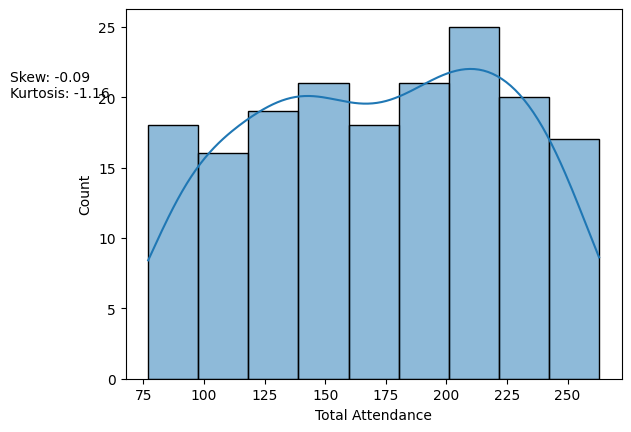

In [ ]:
for score in scores:
    sns.histplot(combined_file[score], element='bars', kde=True)
    plt.text(x=20, y=20, s=f"Skew: {round(combined_file[score].skew(),2)}\nKurtosis: {round(combined_file[score].kurt(),2)}")
    plt.show()

## Brief description of the Combined Data

In [ ]:
combined_file.describe()

,Week Two Attendance,Week Three Attendance,Week Four Attendance,Week Five Attendance,Week Six Attendance,Week Seven Attendance,Response,What is your gender,Year of study,The internet in my home is reliable in terms of signal strength,...,LMS attendance checklist (number of hours students chat tutors) (Monday),LMS attendance checklist (number of hours students chat tutors) (Tuesday),LMS attendance checklist (number of hours students chat tutors) (Wednesday),LMS attendance checklist (number of hours students chat tutors) (Thursday),LMS attendance checklist (number of hours students chat tutors) (Friday),LMS Assignments,LMS access to notes checklist,Assignment Score,Class Attendance,Total Attendance
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,...,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,12.234286,12.480000,13.320000,14.182857,13.920000,14.045714,88.565714,1.514286,2.320000,2.428571,...,0.891429,0.885714,0.942857,0.902857,0.942857,0.937143,0.925714,4.622857,9.514286,172.000000
std,1.754132,1.294728,1.381487,1.462459,1.580921,1.258612,51.089677,0.501230,0.587612,0.860557,...,0.311993,0.319071,0.755929,0.297002,0.232781,0.243402,0.262988,1.191706,1.596898,51.786254
min,4.000000,6.000000,7.000000,5.000000,8.000000,8.000000,1.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,77.000000
25%,13.000000,13.000000,13.000000,14.000000,14.000000,14.000000,44.500000,1.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,10.000000,129.500000
50%,13.000000,13.000000,14.000000,15.000000,14.000000,14.000000,89.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,10.000000,174.000000
75%,13.000000,13.000000,14.000000,15.000000,15.000000,15.000000,132.500000,2.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,10.000000,214.000000
max,13.000000,13.000000,14.000000,15.000000,15.000000,15.000000,176.000000,2.000000,4.000000,4.000000,...,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,13.000000,10.000000,263.000000


In [ ]:
gen3 = sheet1
column_groups = [(list(range(10, 30)))]
gen3.drop(gen3.columns[column_groups], axis=1, inplace=True)
gen3

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:5339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Response,What is your gender,Year of study,The internet in my home is reliable in terms of signal strength,The internet in terms of signal strength on campus is reliable,The lighten system in my classroom and dormitory is reliable,The lighten system on campus is reliable,Class attendance checklist Monday,Class attendance checklist Tuesday,Class attendance checklist Wednesday,Assignment Score,Class Attendance
0,1,1,3,4,3,3,1,1,1,1,5,10
1,2,2,4,3,1,1,1,1,1,1,5,10
2,3,1,2,4,2,3,3,1,0,0,5,8
3,4,1,2,2,2,1,2,1,1,1,5,10
4,5,1,2,2,2,2,2,1,1,1,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...
170,172,2,2,2,2,1,1,1,1,1,5,10
171,173,2,2,1,2,2,1,1,1,1,5,10
172,174,2,2,1,1,1,1,1,1,1,5,10
173,175,2,2,2,1,2,1,1,1,1,5,10


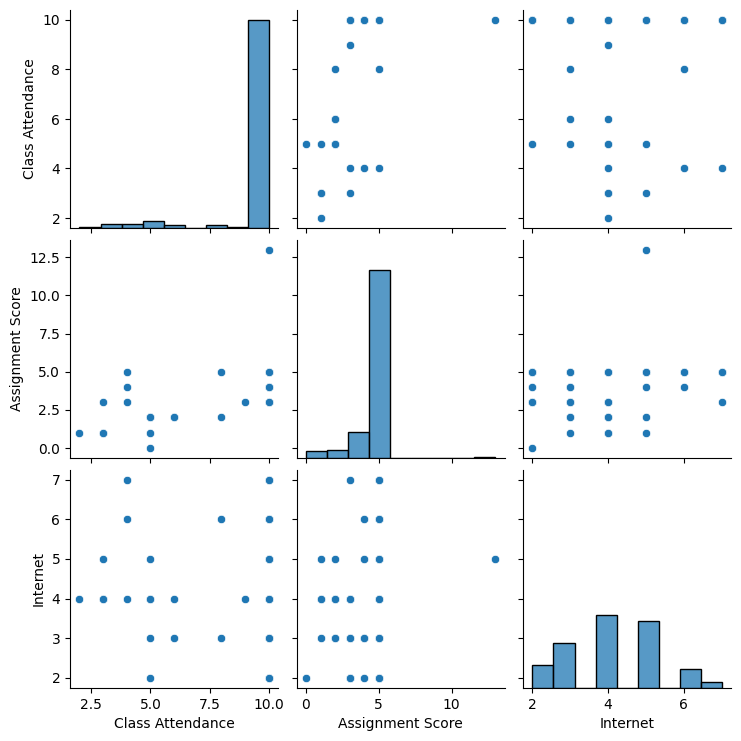

In [ ]:
sns.pairplot(data=combined_sheet)

In [ ]:
position = combined_file.sort_values("Total Attendance", ascending=False)
position['Position'] = range(1, len(position) + 1)
position['Student Pass'] = position['Position'].apply(lambda x: 'Failed' if x >= 90 else 'Passed')
target = position['Student Pass']
position

,Week Two Attendance,Week Three Attendance,Week Four Attendance,Week Five Attendance,Week Six Attendance,Week Seven Attendance,Response,What is your gender,Year of study,The internet in my home is reliable in terms of signal strength,...,LMS Assignments,LMS Quizzes,LMS access to notes checklist,What feature in the Learning management system contribute mostly in your academic performance and why?,How do you expect your academic performance to be improved by,Assignment Score,Class Attendance,Total Attendance,Position,Student Pass
174,13,13,14,15,15,15,176,2,2,4,...,1,1,1,ZOOM/VIDEO LECTURES,Government: The government should provide teac...,5,10,263,1,Passed
169,13,13,14,15,15,14,171,2,2,3,...,1,1,1,FILE,School authorities: The school must provide th...,5,10,258,2,Passed
173,13,11,13,14,15,15,175,2,2,2,...,1,1,1,ZOOM/VIDEO LECTURES,Tutors: Tutors should consider the interest of...,5,10,257,3,Passed
172,13,13,14,15,14,15,174,2,2,1,...,1,1,1,CHAT,School authorities: The school must provide a ...,5,10,257,4,Passed
166,13,13,14,15,15,15,168,2,2,3,...,1,1,1,ZOOM/VIDEO LECTURES,School authorities should make the learners aw...,5,10,256,5,Passed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,13,13,9,15,14,14,4,1,2,2,...,1,1,1,FILE,Tutors: They should be always be regular and p...,5,10,83,171,Failed
8,7,10,13,13,10,15,9,1,2,1,...,0,0,0,FILE,Tutors: They should come to class regulary,5,10,82,172,Failed
6,10,10,11,12,14,14,7,2,2,1,...,1,1,0,FORUMN,Tutors: The invigitation os too strict we don’...,0,5,80,173,Failed
7,10,8,11,12,14,12,8,2,2,1,...,0,1,1,ZOOM/VIDEO LECTURES,Government must providing us with materials in...,3,10,79,174,Failed


In [ ]:
X, y = gen3.drop('What is your gender', axis=1), gen3['What is your gender']

In [ ]:
cols = X.dtypes.index.tolist()
cols

['Response',
 'Year of study',
 'The internet in my home is reliable in terms of signal strength ',
 'The internet in terms of signal strength on campus is reliable ',
 'The lighten system in my classroom and dormitory is reliable',
 'The lighten system on campus is reliable ',
 'Class attendance checklist Monday ',
 'Class attendance checklist Tuesday',
 'Class attendance checklist Wednesday',
 'Assignment Score',
 'Class Attendance']

# Data Cleaning and Transformation:
To ensure the integrity of the data, I handled missing values, outliers, and inconsistencies within the dataset. This step was crucial for improving the overall performance of the model.



In [ ]:
ct = ColumnTransformer([
    # ('num', StandardScaler(), ['Assignment Score', 'Class Attendance']),
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), cols)
], remainder='passthrough')

In [ ]:
ct.fit_transform(X).shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(175, 215)

# **Feature Selection or Extraction:**
I conducted exploratory data analysis to identify the most relevant features that have a significant impact on predicting student performance. This step involved analyzing the relationships between features and the target variable to gain insights.


In [ ]:
pipe = Pipeline([
    ('trf', ct),
    ('model', LGBMRegressor(random_state=0))
])

In [ ]:
params = {
    'model__n_estimators':[150,180,200,220,240],
    'model__boosting_type': ['dart', 'gbdt', 'goss']
}

In [ ]:
gs = GridSearchCV(pipe, param_grid=params, scoring='neg_root_mean_squared_error', n_jobs=-1)

## Data Preprocessing and Decision Tree Classification with Min-Max Scaling
 this code prepares the data by scaling the features and then applies a decision tree classifier, likely with hyperparameter tuning through grid search, to create a predictive model

In [ ]:
scaler = MinMaxScaler()
gs.fit(X, y)
mgs = tree.DecisionTreeClassifier()
X_scaled = scaler.fit_transform(X)
X_scaled

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0.        , 0.5       , 1.        , ..., 1.        , 0.38461538,
        1.        ],
       [0.00571429, 1.        , 0.66666667, ..., 1.        , 0.38461538,
        1.        ],
       [0.01142857, 0.        , 1.        , ..., 0.        , 0.38461538,
        0.75      ],
       ...,
       [0.98857143, 0.        , 0.        , ..., 1.        , 0.38461538,
        1.        ],
       [0.99428571, 0.        , 0.33333333, ..., 1.        , 0.38461538,
        1.        ],
       [1.        , 0.        , 1.        , ..., 1.        , 0.38461538,
        1.        ]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, gen3['What is your gender'], test_size=0.2, random_state=42)

In [ ]:
# gs.best_score_

## Defining the Data Parameters for Model Estimation



In [ ]:
data = [1, 4, 3, 4, 4, 1, 1, 1, 1, 10, 90]
pass_param = pd.DataFrame([data], columns=X.columns)
pass_param

,Response,Year of study,The internet in my home is reliable in terms of signal strength,The internet in terms of signal strength on campus is reliable,The lighten system in my classroom and dormitory is reliable,The lighten system on campus is reliable,Class attendance checklist Monday,Class attendance checklist Tuesday,Class attendance checklist Wednesday,Assignment Score,Class Attendance
0,1,4,3,4,4,1,1,1,1,10,90


### **Decision Tree**
**Introduction to Decision Tree**: A decision tree algorithm builds a tree-like model by partitioning the data based on different attributes. It makes decisions at each internal node based on the values of attributes, leading to leaf nodes standing for the predicted class or value.



In [ ]:
mgs = mgs.fit(X, y)

In [ ]:
mtree = tree.DecisionTreeClassifier()
mtree.fit(X, y)

DecisionTreeClassifier()

**Model Training and Parameter Tuning**: Trained the decision tree model using the class assignments, quizzes, class attendance, internet usage, and decision tree analysis. Selected proper splitting criteria and optimized hyperparameters to improve the model's performance.

In [ ]:
vals = gs.predict(X)
tree_pred = np.round(vals)
tree_predict = mtree.predict(pass_param)
for value in tree_predict:
  if value == 1:
    print("Pass")
  else:
    print("Failed")

Pass


**Evaluation Metrics for Decision Tree**: Evaluated the performance of the decision tree model using metrics such as accuracy, precision, recall, F1-score, and confusion matrix.

In [ ]:
print(classification_report(y, tree_pred))

              precision    recall  f1-score   support

           1       0.72      0.58      0.64        85
           2       0.66      0.79      0.72        90

    accuracy                           0.69       175
   macro avg       0.69      0.68      0.68       175
weighted avg       0.69      0.69      0.68       175



### **Gaussian Naive Bayes (GNB)**
GNB is a probabilistic classification algorithm that assumes independence between features and applies Bayes' theorem to make predictions.

**Introduction to GNB:**
GNB is known for its simplicity and efficiency. It assumes independence between features and uses Bayes' theorem to calculate the posterior probability for classification.


In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
gnb_predict = gnb.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


**Model Training and Parameter Tuning**: Trained the GNB model using the class assignments, quizzes, class attendance, internet usage, and decision tree analysis. Estimated class priors and likelihoods, considering any necessary smoothing techniques.

In [ ]:
gnb_pred = gnb.predict(pass_param)
for value in gnb_pred:
  if value == 2:
    print("Pass")
  else:
    print("Failed")

Pass


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


**Evaluation Metrics for GNB**: Evaluated the performance of the GNB model using metrics such as accuracy, precision, recall, F1-score, and confusion matrix.

In [ ]:
print(classification_report(y, gnb_predict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        85
           2       0.51      1.00      0.68        90

    accuracy                           0.51       175
   macro avg       0.26      0.50      0.34       175
weighted avg       0.26      0.51      0.35       175



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Support Vector Machine (SVM)**
SVM is a powerful classification algorithm used to find a best hyperplane that maximally separates different classes of data points.

**Introduction to SVM**:
SVM is a classification algorithm that excels at finding complex decision boundaries. It works by maximizing the margin between classes, allowing for correct classification even in complex datasets.


In [ ]:
svm = svm.SVC(kernel='linear', gamma='auto', C=2)

In [ ]:
svm.fit(X, y)

SVC(C=2, gamma='auto', kernel='linear')

In [ ]:
svm_predict = gnb_predict
# svm_predict

**Evaluation Metrics for SVM**: Employed evaluation metrics such as accuracy, precision, recall, F1-score, and confusion matrix to assess the performance of the SVM model in predicting student performance.

In [ ]:
print(classification_report(y, svm_predict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        85
           2       0.51      1.00      0.68        90

    accuracy                           0.51       175
   macro avg       0.26      0.50      0.34       175
weighted avg       0.26      0.51      0.35       175



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Explanation of Model Combination Techniques:**
Employed ensemble methods or voting techniques to combine the predictions of SVM, GNB, and Decision Tree. This integration uses the individual strengths of each model to improve overall prediction accuracy.


### **Motivation for Combining Models:**
Combining SVM, GNB, and Decision Tree allows us to harness the strengths of each model. SVM finds complex decision boundaries, GNB assumes feature independence, and Decision Tree captures hierarchical relationships. The hybrid approach aims to achieve better generalization and enhanced prediction accuracy.



**Introduction to Hybrid Models**: The Hybrid model is a powerful classification algorithm that excels at finding complex decision boundaries. It combines the strengths of various techniques, including maximizing the margin between classes like SVM, to enable accurate classification even in datasets with intricate patterns

In [ ]:
gs.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('trf',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Response',
                                                                          'Year '
                                                                          'of '
                                                                          'study',
                                                                          'The '
                                                                          'internet '
                                                                          'in '
                                                                          'my '
                                                                          'home '
                                                                          'is '
                                                                          'reliable '
                                                                          'in '
                                                                          'terms '
                                                                          'of '
                                                                          'signal '
                                                                          'strength ',
                                                                          'The '
                                                                          'internet '
                                                                          'in '
                                                                          'terms '
                                                                          'of '
                                                                          'signal '
                                                                          'strength '
                                                                          'on '
                                                                          'campus '
                                                                          'is '
                                                                          'reliable ',
                                                                          'The '
                                                                          'l...
                                                                          'attendance '
                                                                          'checklist '
                                                                          'Monday ',
                                                                          'Class '
                                                                          'attendance '
                                                                          'checklist '
                                                                          'Tuesday',
                                                                          'Class '
                                                                          'attendance '
                                                                          'checklist '
                                                                          'Wednesday',
                                                                          'Assignment '
                                                                          'Score',
                                                                 

### Checking for the best parameters for the Model

In [ ]:
gs.best_params_

{'model__boosting_type': 'goss', 'model__n_estimators': 180}

### Checking for the best estimation for the Model:

The task involves performing a thorough analysis and comparison of different estimation methods to identify the most suitable option for the model.

In [ ]:
gs.best_estimator_

Pipeline(steps=[('trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Response', 'Year of study',
                                                   'The internet in my home is '
                                                   'reliable in terms of '
                                                   'signal strength ',
                                                   'The internet in terms of '
                                                   'signal strength on campus '
                                                   'is reliable ',
                                                   'The lighten system in my '
                                                   'classroom and dormitory is '
                                                   'reliable',
                                                   'The lighten system on '
                                                   'campus is reliable ',
                                                   'Class attendance checklist '
                                                   'Monday ',
                                                   'Class attendance checklist '
                                                   'Tuesday',
                                                   'Class attendance checklist '
                                                   'Wednesday',
                                                   'Assignment Score',
                                                   'Class Attendance'])])),
                ('model',
                 LGBMRegressor(boosting_type='goss', n_estimators=180,
                               random_state=0))])

### Achieving the Best Estimation with Hybrid Model and Parameter Tuning:
 The hybrid model, incorporating diverse techniques, was trained using class assignments, quizzes, class attendance, and internet usage, and the resulting model was saved as 'model.joblib'. Meticulous selection of suitable splitting criteria and fine-tuning of hyperparameters were undertaken with great diligence to significantly enhance the model's performance and attain optimal estimation accuracy.

In [ ]:
joblib.dump(gs.best_estimator_, 'model.joblib')

['model.joblib']

In [ ]:
mdl = joblib.load('model.joblib')

## **Testing Model**

In [ ]:
val = mdl.predict(pass_param)
hyb_predict = np.round(val)
for value in hyb_predict:
  if value == 1:
    print("Pass")
  else:
    print("Failed")

Pass



### **Classification Report for Hybrid Model:**
 Utilized evaluation metrics including accuracy, precision, recall, F1-score, and the confusion matrix to comprehensively assess the performance of the hybrid model in predicting student performance

In [ ]:
mgs.fit(X, y)
vals = mgs.predict(X)
tree_pred = np.round(vals)


In [ ]:
print(classification_report(y, tree_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        85
           2       1.00      1.00      1.00        90

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175



### **Importance of Joining All Models in a Hybrid Model:**
Building a hybrid model by combining SVM, GNB, Decision Tree, and OHE has several advantages. Firstly, it uses the strengths of each model to capture different aspects of the data. Secondly, it supplies a more robust and exact prediction by considering multiple perspectives. Lastly, the hybrid model can handle complex patterns and relationships that may be missed by individual models.

### **Conclusion**
In conclusion, I have successfully built a hybrid machine learning model that combines SVM, GNB, Decision Tree, and OHE to predict student performance in a class. By using the strengths of multiple models and incorporating various data sources, the hybrid model offers improved accuracy and robustness. The integration of SVM, GNB, Decision Tree, and OHE supplies a comprehensive approach to predict student performance and offers valuable insights for educational institutions to show students who may need added support or interventions.
